## Ex 4.1

_Calculate the number of minutes between today and the beginning of 2018_.

In [52]:
# Your answer
import datetime as dt

((dt.datetime.now() - dt.datetime(year=2018, month=1, day=1)).seconds)//60

821

## Ex 4.2

_Calculate the monthly return and volatility for the stock Tesla (TSLA), and plot them. For the volatility, apply a rolling window of 20._

In [53]:
# Your answer
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
df = yf.download("TSLA")
df["pct return"] = df["Close"].pct_change()
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,pct return
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,NaN
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,-0.002512
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,-0.078472
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,-0.125683
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,-0.160938


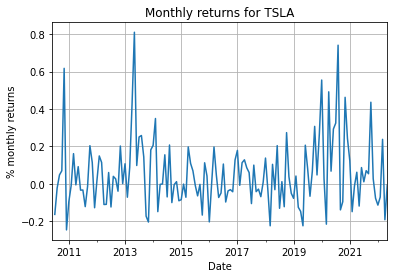

In [54]:
df['Close'].resample('M').ffill().pct_change().plot()
plt.title("Monthly returns for TSLA")
plt.ylabel('% monthly returns')
plt.grid()
plt.show()

In [55]:
month_ret = df['Close'].resample('M').ffill().pct_change()
month_ret

Date
2010-06-30         NaN
2010-07-31   -0.163240
2010-08-31   -0.023069
2010-09-30    0.047741
2010-10-31    0.070064
                ...   
2022-01-31   -0.113609
2022-02-28   -0.070768
2022-03-31    0.238009
2022-04-30   -0.191945
2022-05-31   -0.005868
Freq: M, Name: Close, Length: 144, dtype: float64

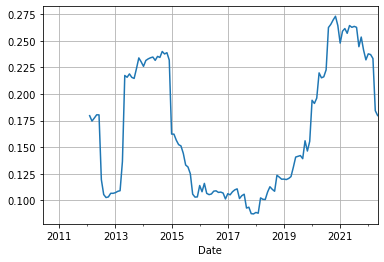

In [57]:
month_vol = month_ret.rolling(20).std()
month_vol.plot()
plt.grid()
plt.show()

## Ex 4.3

Calculate the correlation between the returns of the gold price (ticker 'GLD'), gold stocks (tickers 'NEM', 'FNV'), and gold ETF (ticker 'GDX').

In [58]:
# Your answer
df = yf.download("GLD NEM FNV GDX", start="2009-01-01")
df.head()


[*********************100%***********************]  4 of 4 completed


Adj Close                                       Close             \
                  FNV        GDX        GLD        NEM        FNV        GDX   
Date                                                                           
2008-12-31  15.160263  30.884893  86.519997  31.946177  17.360001  33.880001   
2009-01-02  15.011809  30.374393  86.230003  31.655752  17.190001  33.320000   
2009-01-05  14.889544  28.934072  84.480003  30.470530  17.049999  31.740000   
2009-01-06  14.758548  29.727167  85.129997  31.043526  16.900000  32.610001   
2009-01-07  14.286982  27.393475  82.750000  27.558491  16.360001  30.049999   

                                       High             ...        Low  \
                  GLD        NEM        FNV        GDX  ...        GLD   
Date                                                    ...              
2008-12-31  86.519997  40.700001  17.430000  33.919998  ...  84.279999   
2009-01-02  86.230003  40.330002  17.629999  34.450001  ...  85.839996   
2009-01-05  84.480003  38.820000  17.049999  32.580002  ...  83.239998   
2009-01-06  85.129997  39.549999  18.110001  33.259998  ...  83.000000   
2009-01-07  82.750000  35.110001  16.870001  32.360001  ...  82.209999   

                            Open                                  Volume  \
                  NEM        FNV        GDX        GLD        NEM    FNV   
Date                                                                       
2008-12-31  39.099998  16.950001  32.500000  84.980003  39.110001   8100   
2009-01-02  40.110001  17.629999  33.509998  85.930000  40.130001  14300   
2009-01-05  38.130001  16.299999  31.959999  83.620003  38.680000   2100   
2009-01-06  38.250000  16.969999  31.830000  83.370003  38.540001   3600   
2009-01-07  34.750000  16.870001  32.360001  84.559998  39.270000  10400   

                                         
                GDX       GLD       NEM  
Date                                     
2008-12-31  4366200   7837100   5107200  
2009-01-02  4846500   6411600   6849800  
2009-01-05  7600000   9534700   8893400  
2009-01-06  8024000  12864600   8450800  
2009-01-07  6701100  13360000  11585100  

[5 rows x 24 columns]

In [64]:
pct_returns = df["Adj Close"].pct_change().dropna()
pct_returns.head(10)

,FNV,GDX,GLD,NEM
Date,,,,
2009-01-02,-0.009792,-0.016529,-0.003352,-0.009091
2009-01-05,-0.008145,-0.047419,-0.020295,-0.037441
2009-01-06,-0.008798,0.027410,0.007694,0.018805
2009-01-07,-0.031952,-0.078504,-0.027957,-0.112263
2009-01-08,0.020783,0.057904,0.020665,0.075192
2009-01-09,0.031736,-0.015099,-0.006394,-0.018808
2009-01-12,-0.061521,-0.075375,-0.037655,-0.030507
2009-01-13,-0.015461,0.019689,0.001486,0.002506
2009-01-14,-0.039573,-0.044715,-0.013477,-0.013611


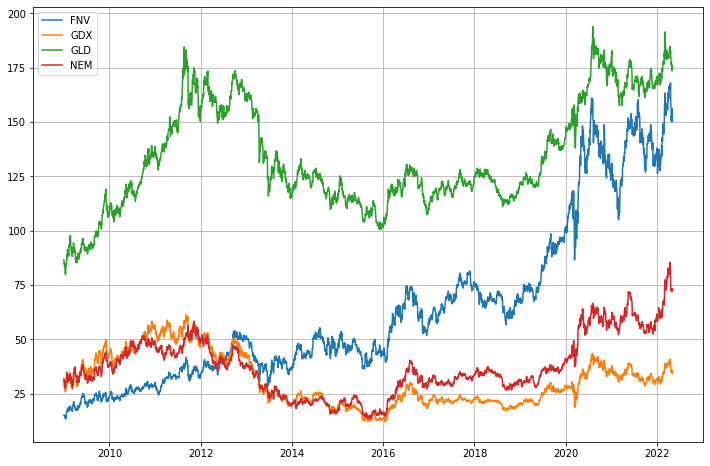

In [65]:
plt.figure(figsize=(12,8))
plt.plot(df["Adj Close"])
plt.legend(["FNV", "GDX", "GLD", "NEM"])

plt.grid()
plt.show()

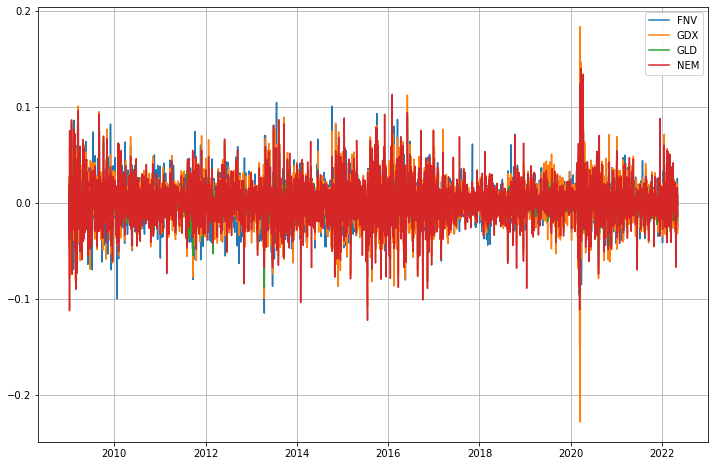

In [66]:
plt.figure(figsize=(12,8))
plt.plot(pct_returns)
plt.legend(["FNV", "GDX", "GLD", "NEM"])

plt.grid()
plt.show()

In [67]:
corr = pct_returns.corr()
corr

,FNV,GDX,GLD,NEM
FNV,1.000000,0.796882,0.639303,0.690286
GDX,0.796882,1.000000,0.757077,0.868244
GLD,0.639303,0.757077,1.000000,0.665051
NEM,0.690286,0.868244,0.665051,1.000000
